<a href="https://colab.research.google.com/github/suryatejaganji/DATA-ANALYSIS-USING-PYTHON/blob/main/Week_9_Tuesday_28_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Input parameters for the simulation
lambda_rate = 15  # Average number of calls per hour
num_hours = 8     # Full working day in hours

# Simulate the number of calls received per hour
# np.random.poisson(lambda, size) generates 'size' number of samples
# from a Poisson distribution with parameter 'lambda'.
hourly_calls = np.random.poisson(lambda_rate, size=num_hours)

print(f"Simulated hourly call counts over {num_hours} hours: {hourly_calls}")
print(f"Mean of simulated hourly calls: {np.mean(hourly_calls):.2f}")
print(f"Standard deviation of simulated hourly calls: {np.std(hourly_calls):.2f}")

Simulated hourly call counts over 8 hours: [18 12 11 11  8  8 12 20]
Mean of simulated hourly calls: 12.50
Standard deviation of simulated hourly calls: 4.06


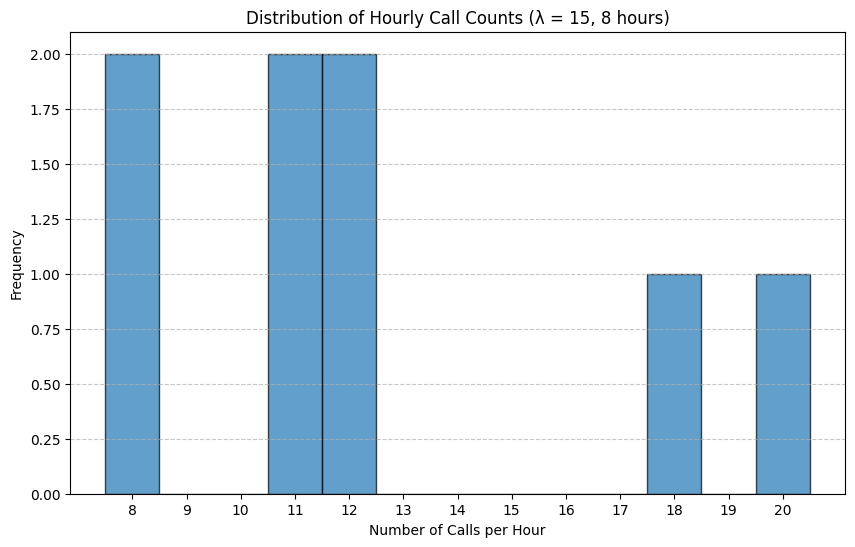

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(hourly_calls, bins=np.arange(min(hourly_calls)-0.5, max(hourly_calls)+1.5, 1), edgecolor='black', alpha=0.7)
plt.title(f'Distribution of Hourly Call Counts (\u03BB = {lambda_rate}, {num_hours} hours)')
plt.xlabel('Number of Calls per Hour')
plt.ylabel('Frequency')
plt.xticks(np.arange(min(hourly_calls), max(hourly_calls)+1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
lambda_values = [5, 10, 15, 25, 40]
num_trials = 1000
simulated_distributions = {}

for lambda_val in lambda_values:
    simulated_distributions[lambda_val] = np.random.poisson(lambda_val, size=num_trials)

print("Simulated Poisson distributions stored in 'simulated_distributions' dictionary.")
for lambda_val, distribution in simulated_distributions.items():
    print(f"  Lambda = {lambda_val}: Mean = {np.mean(distribution):.2f}, Std Dev = {np.std(distribution):.2f}, First 5 samples = {distribution[:5]}")

Simulated Poisson distributions stored in 'simulated_distributions' dictionary.
  Lambda = 5: Mean = 4.96, Std Dev = 2.14, First 5 samples = [8 3 4 7 8]
  Lambda = 10: Mean = 10.06, Std Dev = 3.07, First 5 samples = [ 9  6 11 15 12]
  Lambda = 15: Mean = 15.10, Std Dev = 3.92, First 5 samples = [ 9  9  9 15 16]
  Lambda = 25: Mean = 24.92, Std Dev = 5.09, First 5 samples = [25 28 19 35 25]
  Lambda = 40: Mean = 40.16, Std Dev = 6.05, First 5 samples = [35 44 44 52 44]


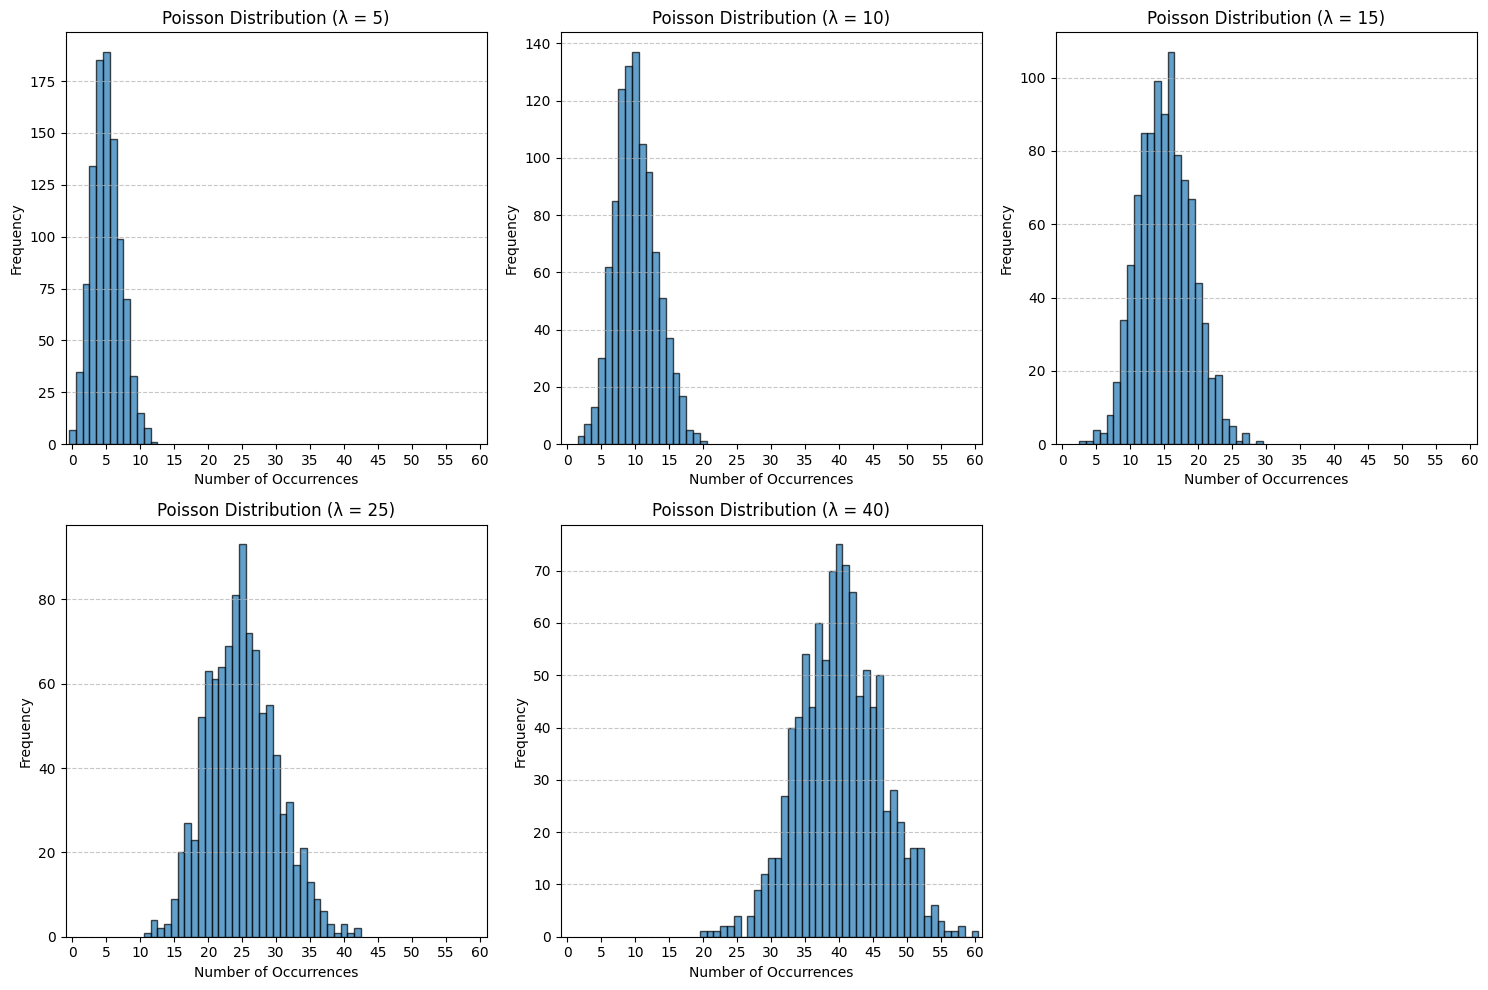

Histograms of Poisson distributions for different lambda values have been plotted.


In [18]:
min_val = min(dist.min() for dist in simulated_distributions.values())
max_val = max(dist.max() for dist in simulated_distributions.values())

# Create a figure and a set of subplots
# Given 5 lambda values, a 2x3 grid is suitable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2x3 array of axes for easier iteration

for i, (lambda_val, distribution) in enumerate(simulated_distributions.items()):
    ax = axes[i]

    # Determine bins for the histogram, covering the range of values with unit width
    bins = np.arange(distribution.min() - 0.5, distribution.max() + 1.5, 1)

    ax.hist(distribution, bins=bins, edgecolor='black', alpha=0.7)
    ax.set_title(f'Poisson Distribution (λ = {lambda_val})')
    ax.set_xlabel('Number of Occurrences')
    ax.set_ylabel('Frequency')
    ax.set_xlim(min_val - 1, max_val + 1) # Apply consistent x-axis limits
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks(np.arange(min_val, max_val + 1, 5) if max_val - min_val > 10 else np.arange(min_val, max_val + 1, 1))

# Remove any unused subplots if the number of lambda values is not a multiple of 3
for j in range(len(simulated_distributions), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Histograms of Poisson distributions for different lambda values have been plotted.")